# Predicting Poker Hand

### STEP 1: IMPORTING LIBRARIES

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

### STEP 2: LOADING THE DATASET

In [3]:
poker_df = pd.read_csv('poker_hand_train_true.csv')
poker_df 

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


### STEP 3: ANALYSING AND PRE-PROCESSING THE DATA

### STEP 4: CHANGING NAMES OF COLUMN ACCORDING TO THE REFERENCES PROVIDED FROM WHERE THE DATASET IS OBTAINED

In [4]:
poker_df.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']

poker_df

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


In [5]:
### 4) SEPERATING THE DATASET INTO FEATURES (X) AND TARGET VALUES (y)
X = poker_df.iloc[:, 0:9]
y = poker_df.hand

### STEP 5: VISUALIZING WHETHER CLASS BALANCE IS PRESENT IN OUR DATASET OR NOT

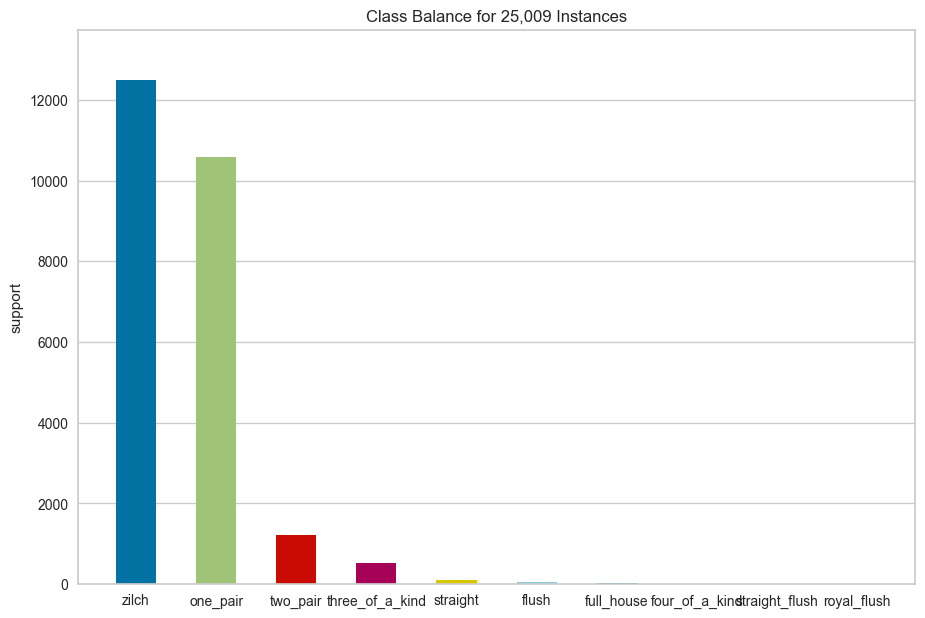

<Axes: title={'center': 'Class Balance for 25,009 Instances'}, ylabel='support'>

In [6]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassPredictionError

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

##### THUS THERE IS CLASS IMBALANCE PRESENT IN OUR DATASET, ANS WE MUST REMOVE IT

### STEP 6: UP-SAMPLING FROM MINORITY CLASSES

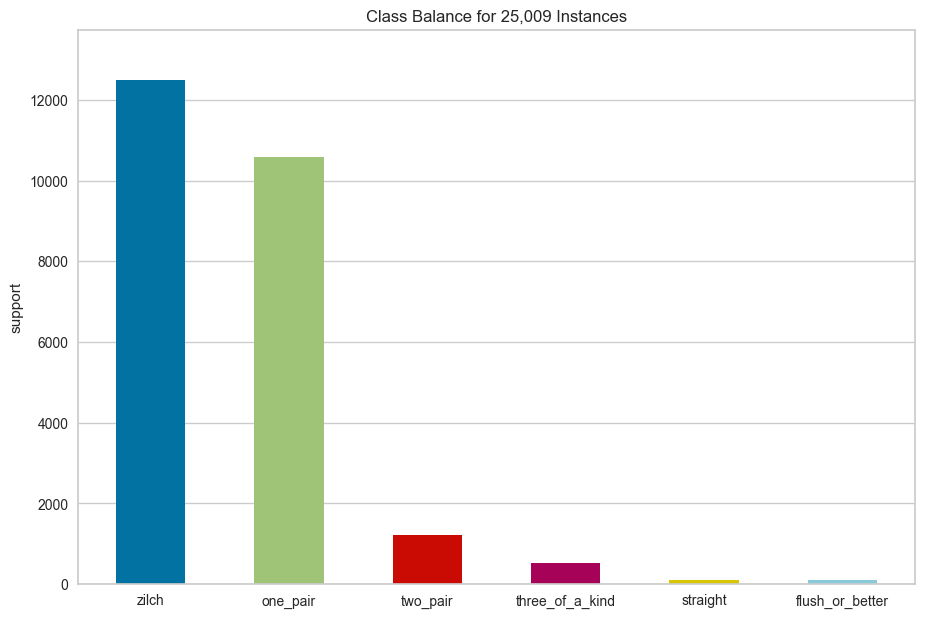

<Axes: title={'center': 'Class Balance for 25,009 Instances'}, ylabel='support'>

In [7]:
poker_df.loc[poker_df['hand']>=5, 'hand'] = 5

y = poker_df.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

### STEP 7: TRAINING THE RANDOM FORESTS CLASSIFIER

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#CLF = SVC()
CLF = MLPClassifier(solver = 'adam', alpha = 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate = 'adaptive', activation = 'tanh')

CLF.fit(X_train, y_train)

C:\Users\arpit\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')

### STEP 8: EVALUATING THE MODEL

In [45]:
#### A) CLASSIFICATION ACCURACY

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

y_pred_test = CLF.predict(X_test)
y_pred_train = CLF.predict(X_train)

print ("Accuracy of the Model on Train Data is : {}".format(accuracy_score(y_train, y_pred_train)))
print ("Accuracy of the Model on Test Data is : {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of the Model on Train Data is : 0.7455214331413947
Accuracy of the Model on Test Data is : 0.7032387045181927


### STEP 9: CLASSIFICATION REPORT HEATMAP

/home/rhyme/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,
/home/rhyme/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


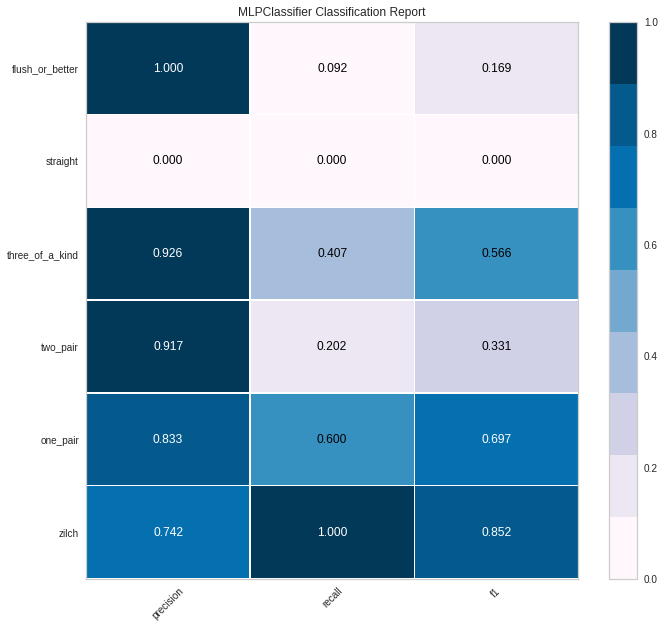

In [12]:
from yellowbrick.classifier import ClassificationReport

report = ClassificationReport(CLF, size = (720, 640), classes = labels, cmap = 'PuBu')
report.score(X_test, y_test)
report.show()

### STEP 10: CLASS PREDICTION ERROR

/home/rhyme/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


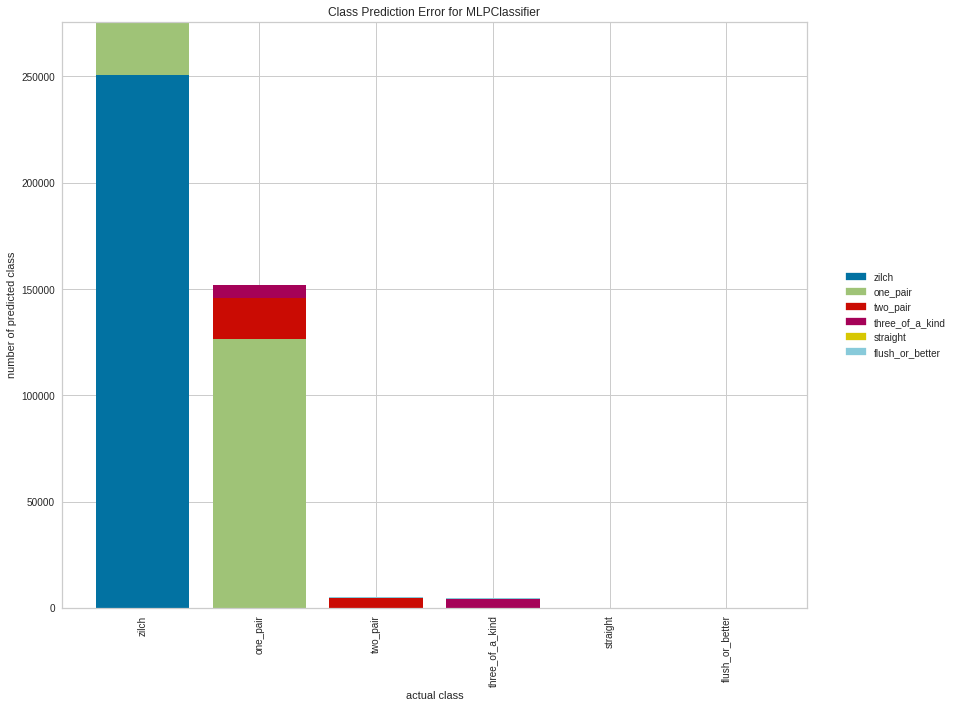

In [13]:
error = ClassPredictionError(CLF, size= [1080, 720], classes = labels)
error.score(X_test, y_test)
error.poof()